In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib
from datetime import datetime

calculated = pd.read_csv('actogram_1_10min_5min.csv').sort_values('from_time')
calculated = pd.read_csv('7-days.csv').sort_values('from_time')

In [2]:
from chronobiology.chronobiology import CycleAnalyzer

In [3]:
nights = np.array([False] * len(calculated['hr_means']))
timestamps = np.array([t.asm8 for t in calculated['from_time'].astype('datetime64',copy=False)])

In [13]:
hr_means = []
for i in range(len(calculated['hr_means'])):
    if i == 0 or calculated['hr_means'][i] > 200:
        hr_means += [calculated['hr_means'][i]]
    else:
        hr_means += [hr_means[i-1]]
hr_means = np.array(hr_means)
hr_means = np.array(calculated['activity'])
# hr_means = np.array(hr_means-min(hr_means))
# hr_means = np.array((hr_means) / max(hr_means))[:1000]

In [18]:
ca = CycleAnalyzer(timestamps, activity=hr_means, night=nights, step='5m', min_duration='5m', min_activity=2)

ValueError: Axis limits cannot be NaN or Inf

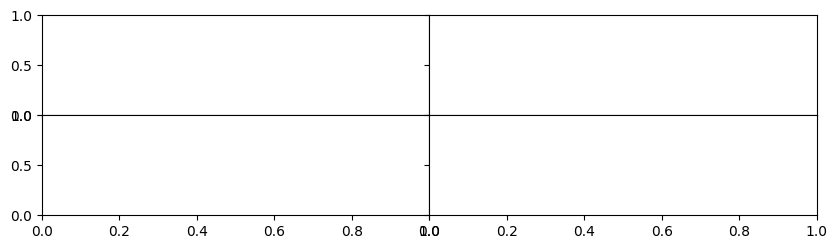

In [19]:
ca.plot_actogram()

In [244]:
min(hr_means)